In [21]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, f1_score, precision_recall_curve, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

In [2]:
#Task 1
df = pd.read_csv('/kaggle/input/wa-fnusec-telcocustomerchurn/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [3]:
#Task 2.1
print(df.isna().sum())

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [4]:
#Task 2.2
print(df.dtypes)

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object


In [5]:
#Task 2.3
print(df.describe())

       SeniorCitizen       tenure  MonthlyCharges
count    7043.000000  7043.000000     7043.000000
mean        0.162147    32.371149       64.761692
std         0.368612    24.559481       30.090047
min         0.000000     0.000000       18.250000
25%         0.000000     9.000000       35.500000
50%         0.000000    29.000000       70.350000
75%         0.000000    55.000000       89.850000
max         1.000000    72.000000      118.750000


In [6]:
#Task 3
df = df.drop('customerID', axis=1)

In [7]:
#Task 4.1
df['Churn'] = np.where(df['Churn'] == 'Yes', 1, 0)

In [8]:
#Task 4.2
df['TotalCharges'] = df['TotalCharges'].replace(' ', np.nan).astype(float)
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].mean())

In [9]:
#Task 5
cat_cols = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
            'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
            'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
            'PaperlessBilling', 'PaymentMethod']
df = pd.get_dummies(df, columns=cat_cols)

In [10]:
#Task 6
correlation_matrix = df.corr()
churn_correlation = correlation_matrix['Churn']
print(churn_correlation)

SeniorCitizen                              0.150889
tenure                                    -0.352229
MonthlyCharges                             0.193356
TotalCharges                              -0.199428
Churn                                      1.000000
gender_Female                              0.008612
gender_Male                               -0.008612
Partner_No                                 0.150448
Partner_Yes                               -0.150448
Dependents_No                              0.164221
Dependents_Yes                            -0.164221
PhoneService_No                           -0.011942
PhoneService_Yes                           0.011942
MultipleLines_No                          -0.032569
MultipleLines_No phone service            -0.011942
MultipleLines_Yes                          0.040102
InternetService_DSL                       -0.124214
InternetService_Fiber optic                0.308020
InternetService_No                        -0.227890
OnlineSecuri

In [11]:
#Task 7
scaler = MinMaxScaler()
num_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
df[num_cols] = scaler.fit_transform(df[num_cols])

In [12]:
#Task 8
X = df.drop('Churn', axis=1)
y = df['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

In [13]:
#Task 9
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [14]:
# Task 10.1
y_pred = rf.predict(X_test)

In [15]:
#Task 10.2
conf_mat = confusion_matrix(y_test, y_pred)
print(conf_mat)

[[1384  168]
 [ 288  273]]


In [16]:
#Task 10.3
f1 = f1_score(y_test, y_pred)
print(f1)

0.5449101796407186


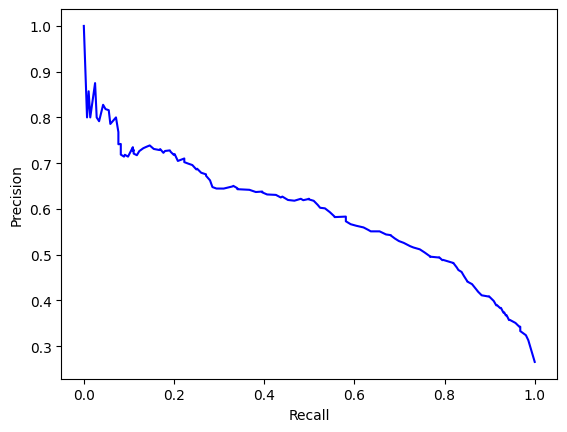

In [17]:
#Task 10.4
precision, recall, thresholds = precision_recall_curve(y_test, rf.predict_proba(X_test)[:, 1])
plt.plot(recall, precision, 'b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()

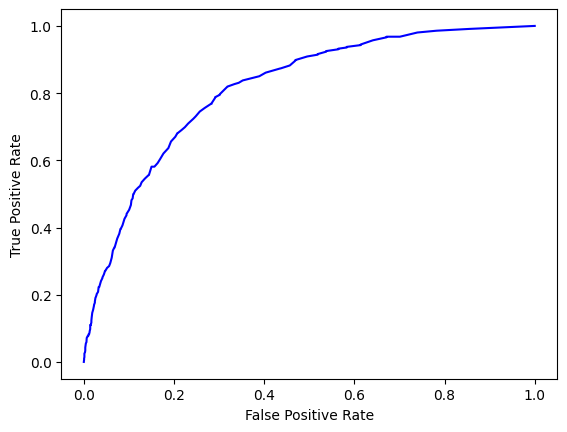

In [18]:
#Task 10.5
fpr, tpr, thresholds = roc_curve(y_test, rf.predict_proba(X_test)[:, 1])
plt.plot(fpr, tpr, 'b')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [19]:
#Task 11
auc = roc_auc_score(y_test, y_pred)
print(auc)

0.6891917966811841
